# Linear Perceptron

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/CIS_5810_Project_8_Linear_Perceptron_Student_Files_V2

/content/drive/MyDrive/CIS_5810_Project_8_Linear_Perceptron_Student_Files_V2


In [4]:
import numpy as np
import glob
from helperP import *
import time

### Define linear perceptron class

In [80]:
class PrimalPerceptron(object):
	def __init__(self, x, y, lr = 0.1, w = None, b = None):
		n_samples, n_features = x.shape
		if not w: w = np.random.rand(n_features,1)
		np.random.seed(0)
	
		if not b: b = np.random.rand(1,1)
		self.x, self.y, self.w, self.b = x, y, w, b
		self.lr = lr
        
	def predict(self):
       
				preds = np.dot(self.x, self.w) + self.b
				y_hat = np.where(preds < 0, -1, 1)
				return preds, y_hat

	def update(self):
        ####################################
        # TODO: YOUR CODE HERE, backward
        ####################################
        # update the weights and bias
				preds, y_hat = self.predict()
       
				y_ = np.where(y_hat != self.y, self.y, 0)
				y_ = y_.reshape(-1,1)
				update_w = np.mean(np.multiply(y_,self.x), axis =0).reshape(-1,1)
				update_b = np.mean(y_, axis =0)
				self.w += (update_w * lr)
				self.b += (update_b * lr)
				return 
	

	 


In [81]:
## Test ##
x = np.random.randn(10, 2)
y = np.random.randint(0, 2, size=(10, 1))
y[y == 0] = -1
p = PrimalPerceptron(x, y)
pred, y_pred = p.predict()
assert pred.shape[0] == 10
assert np.logical_or(y_pred == 1, y_pred == -1).all()
p.update()
assert p.w.shape[0] == x.shape[1]
assert p.b.shape[0] == 1
print('test passed')

test passed


### Train linear perceptron

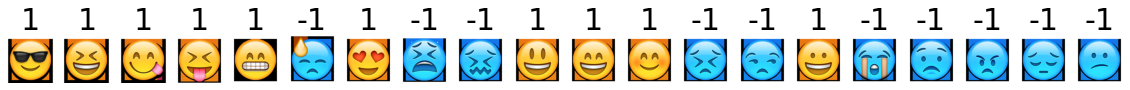

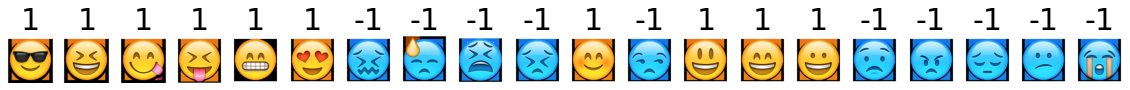

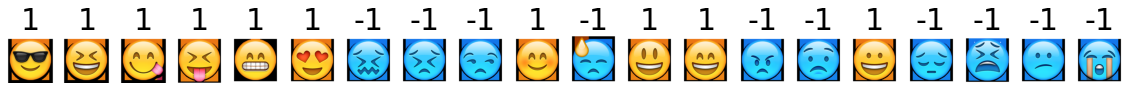

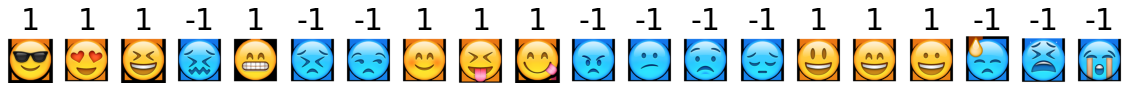

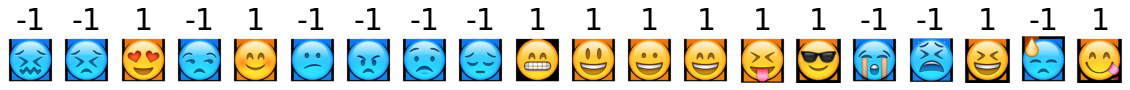

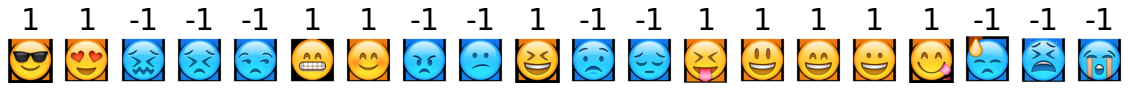

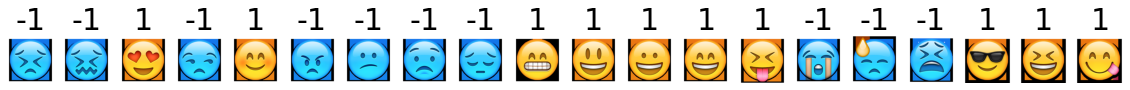

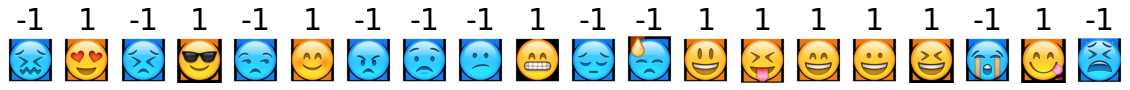

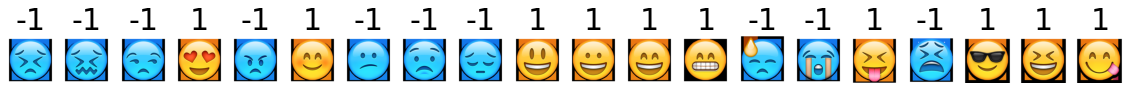

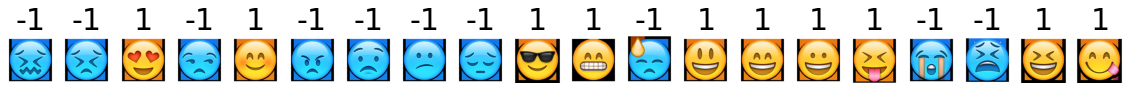

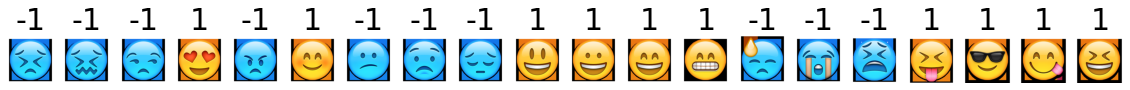

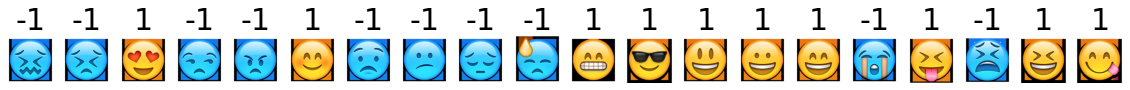

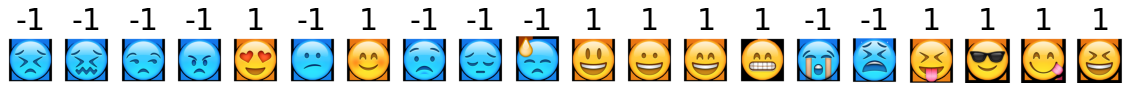

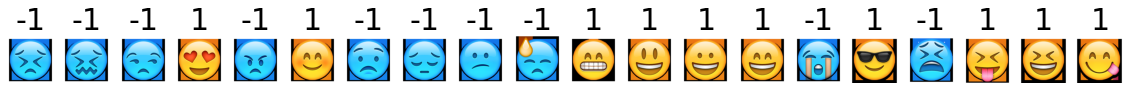

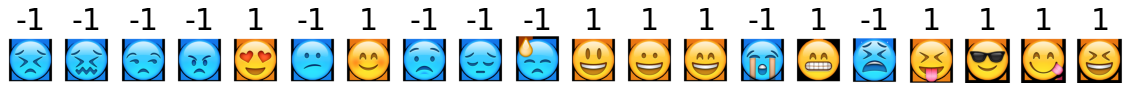

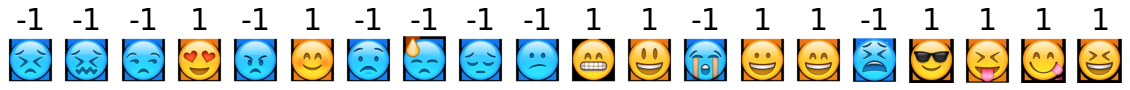

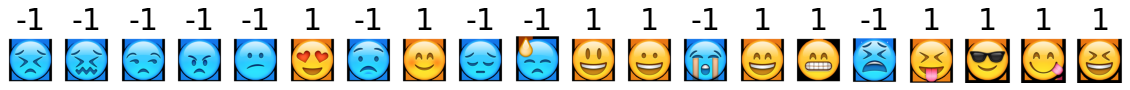

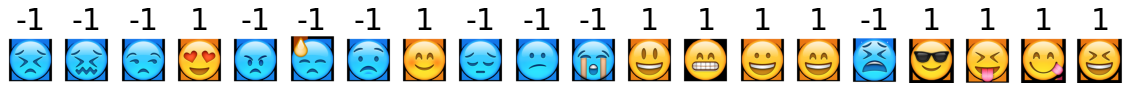

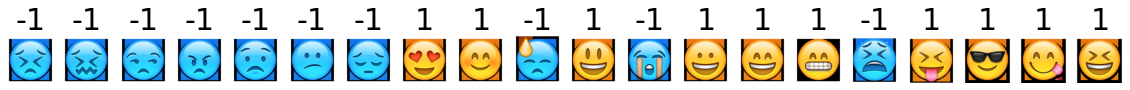

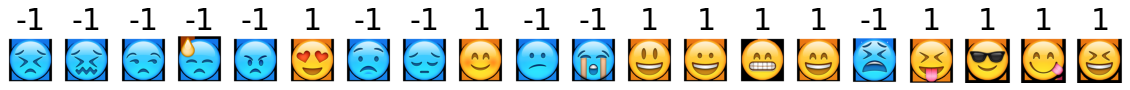

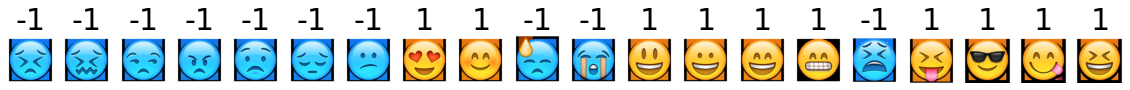

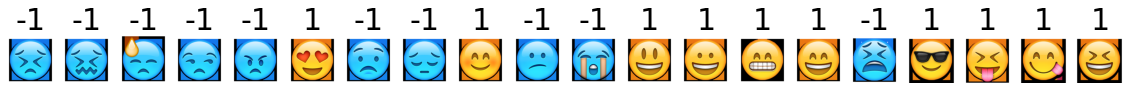

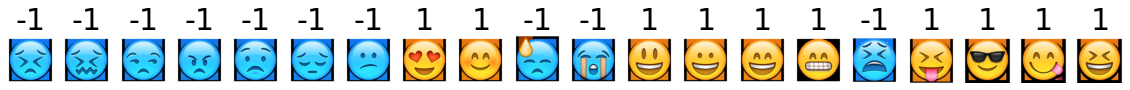

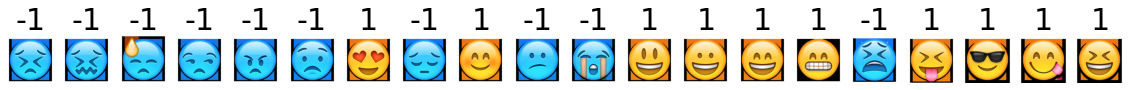

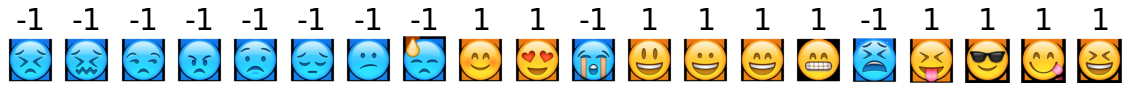

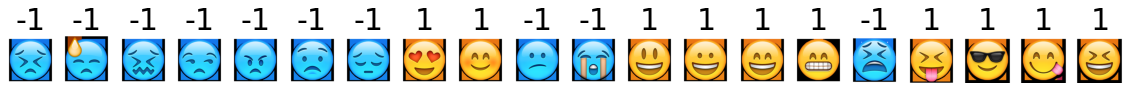

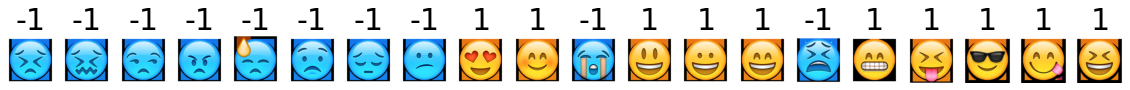

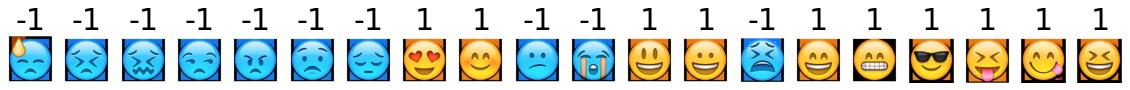

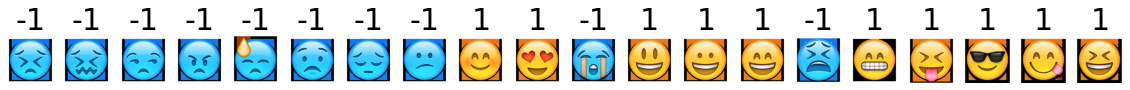

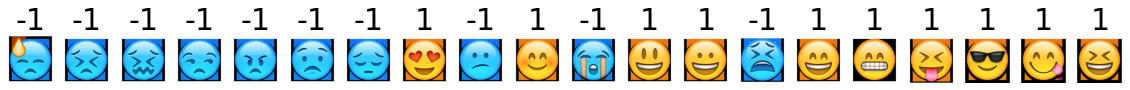

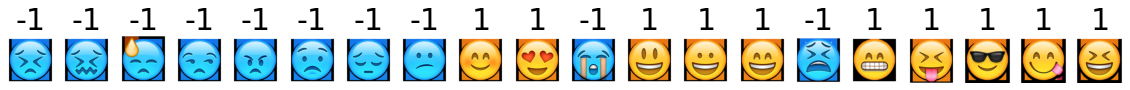

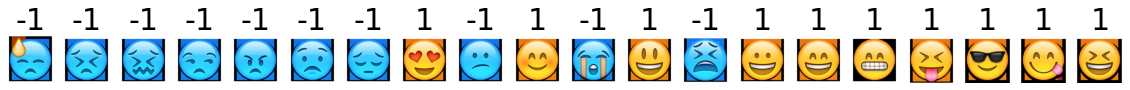

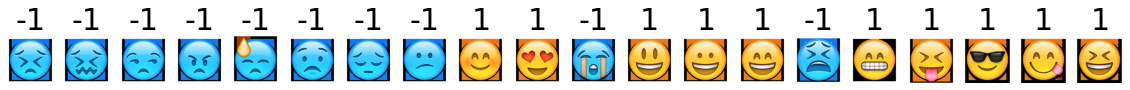

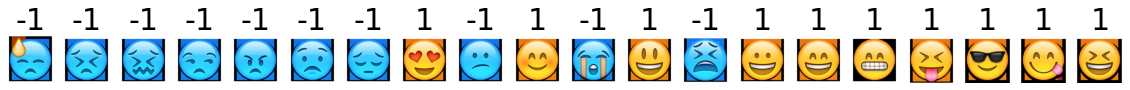

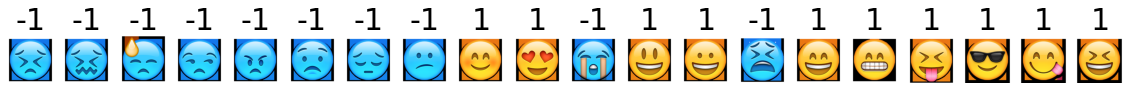

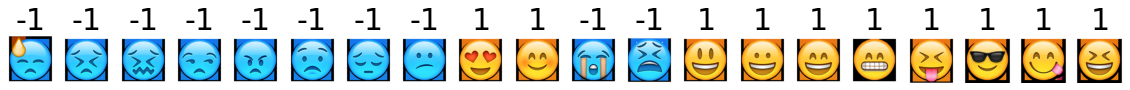

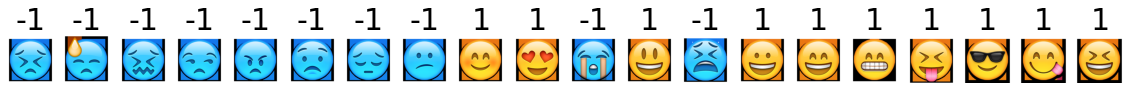

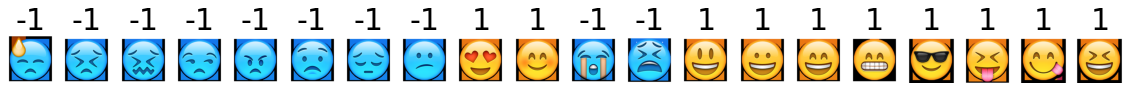

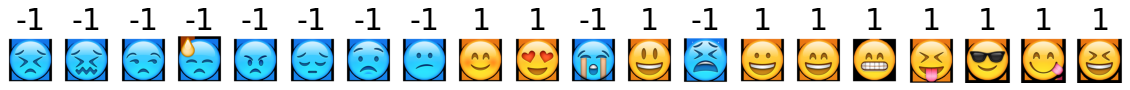

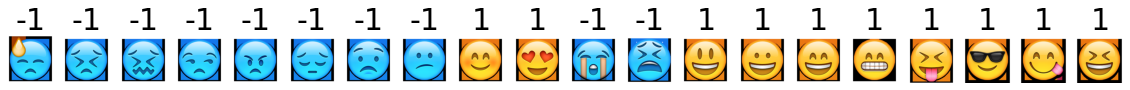

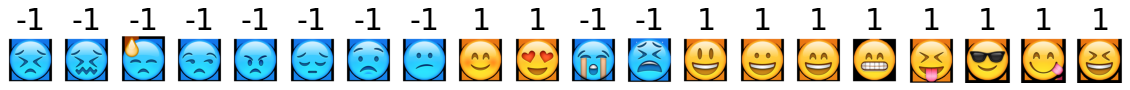

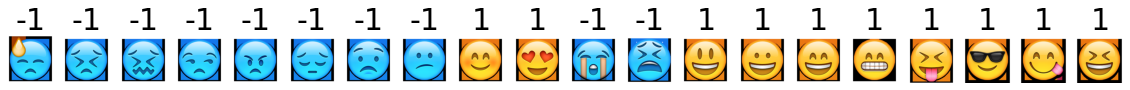

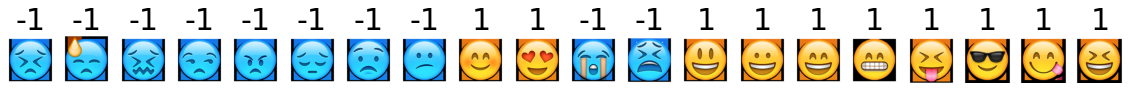

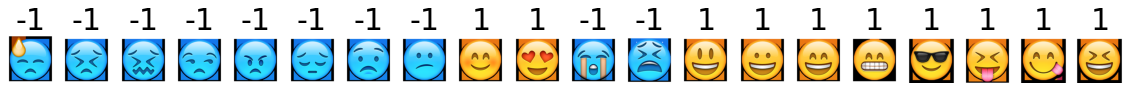

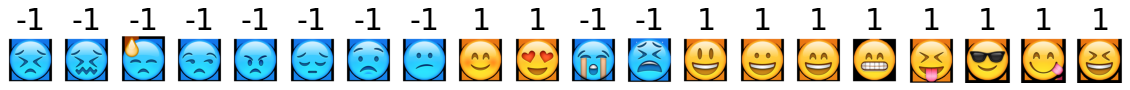

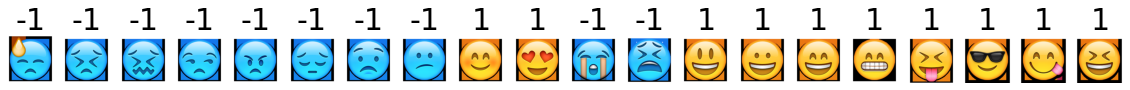

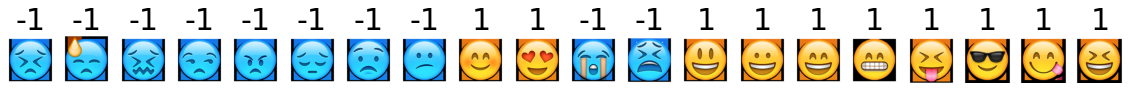

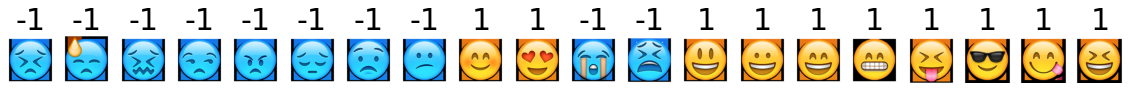

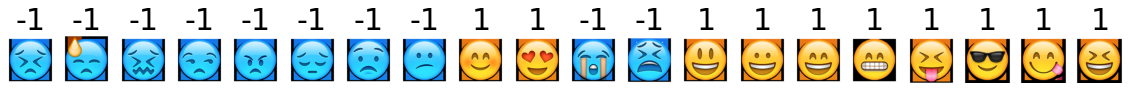

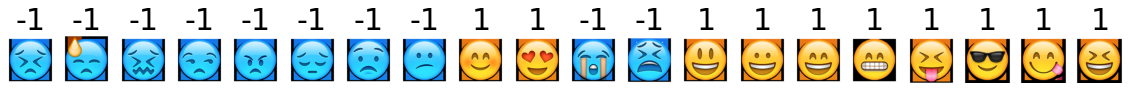

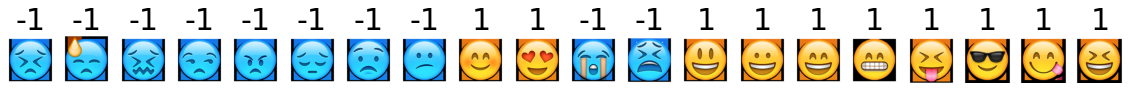

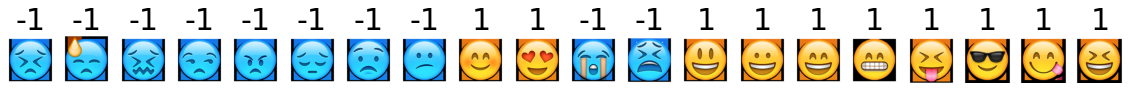

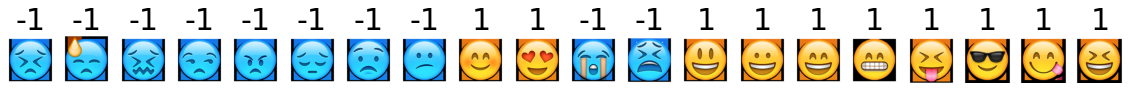

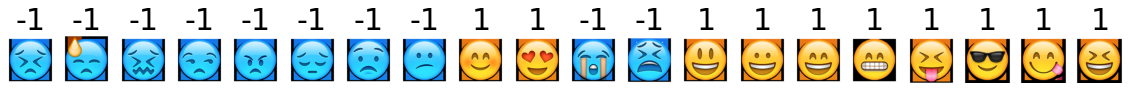

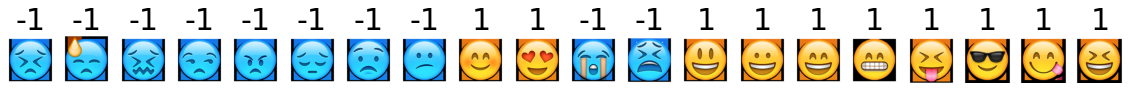

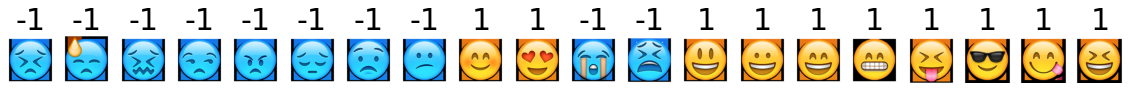

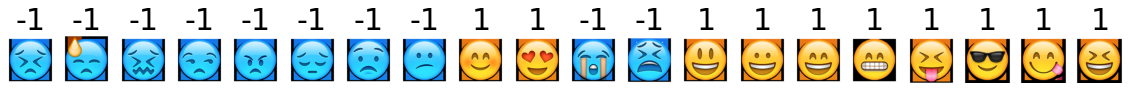

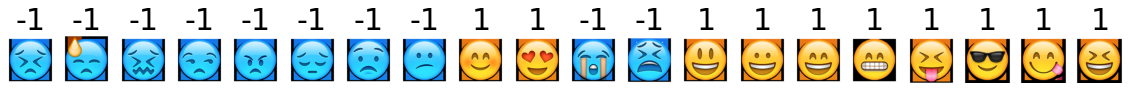

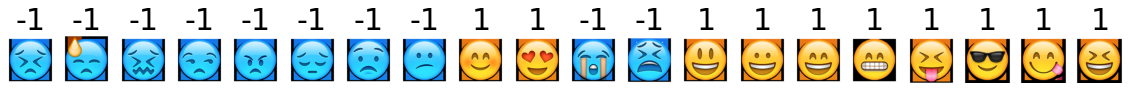

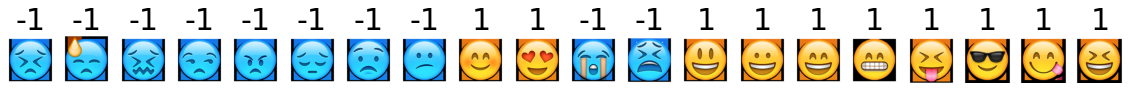

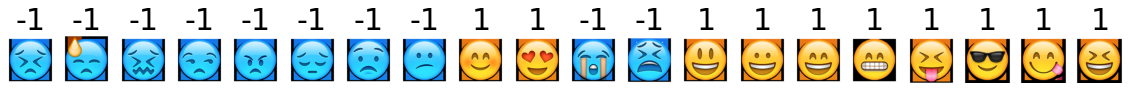

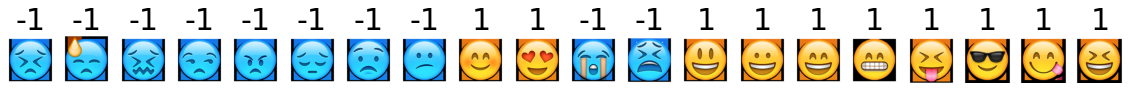

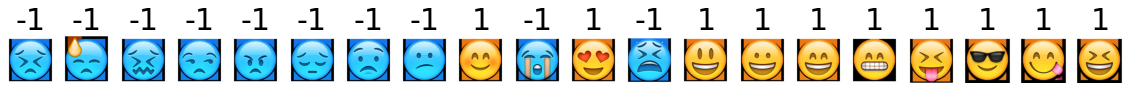

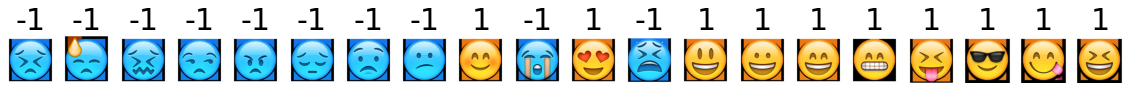

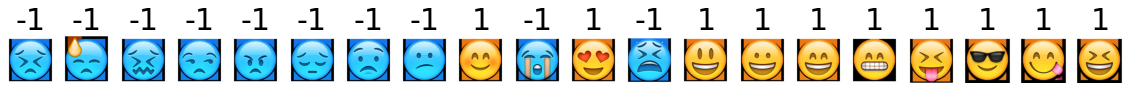

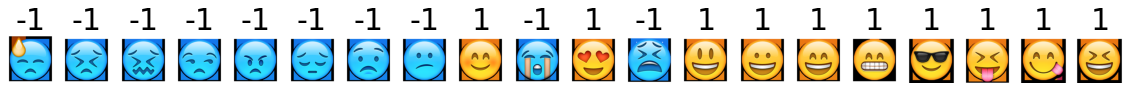

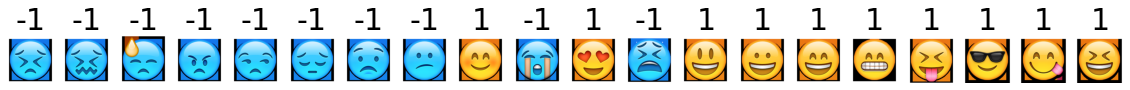

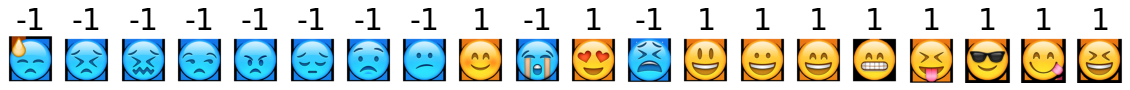

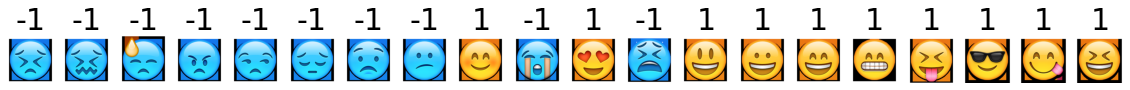

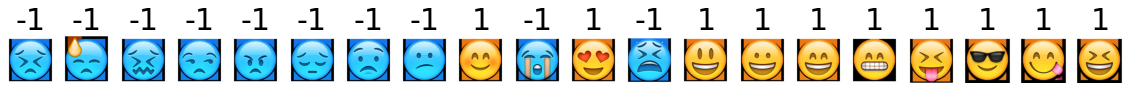

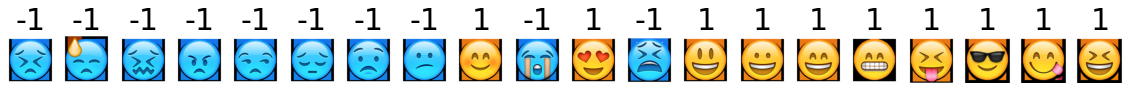

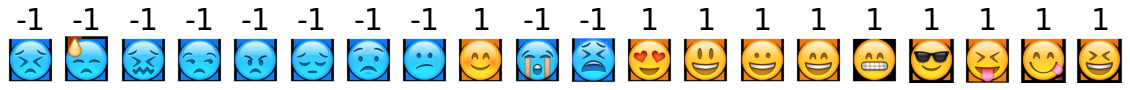

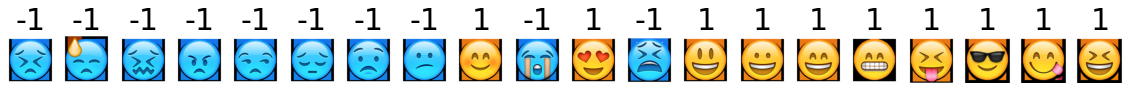

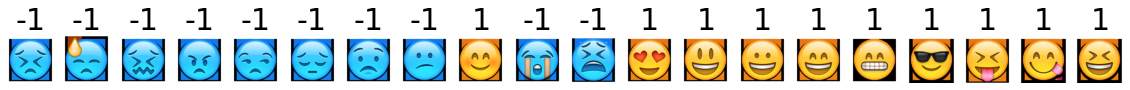

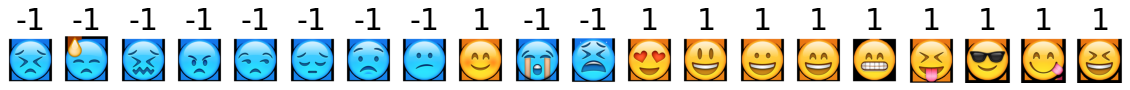

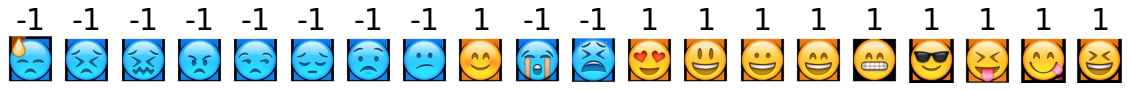

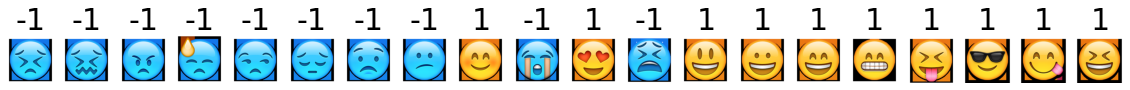

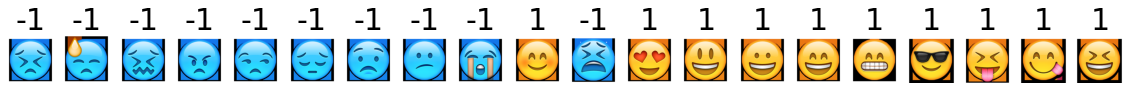

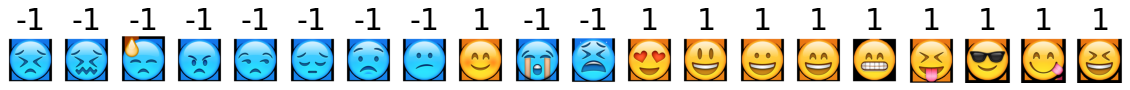

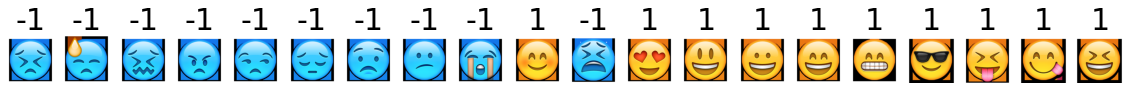

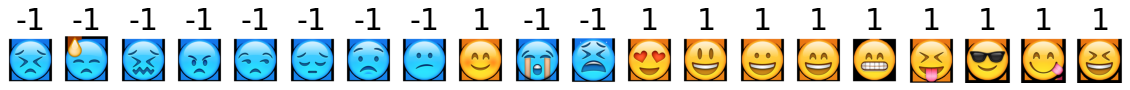

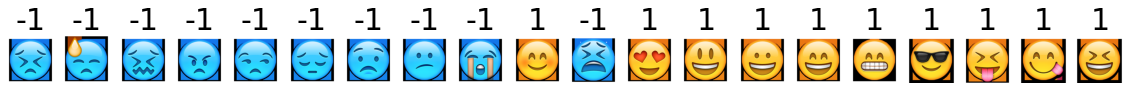

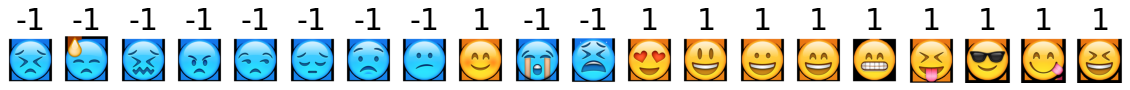

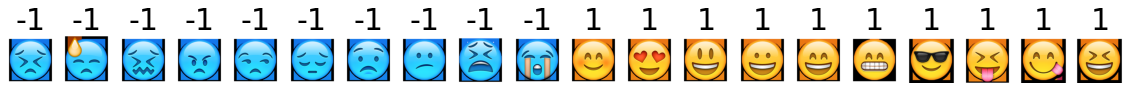

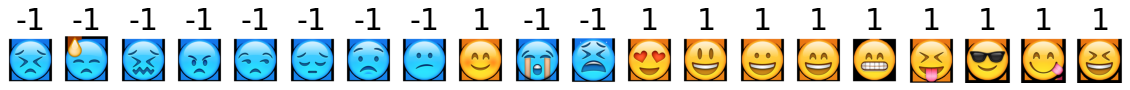

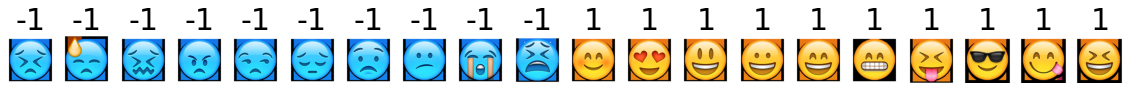

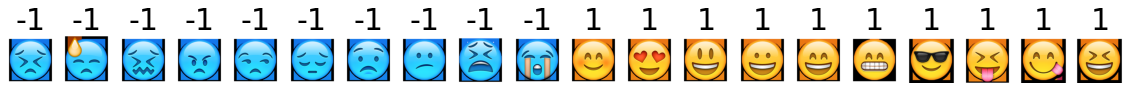

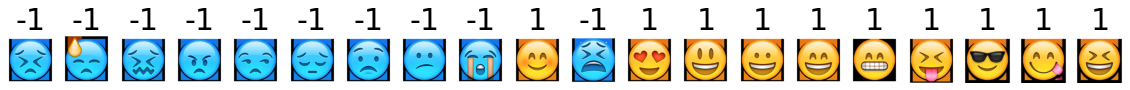

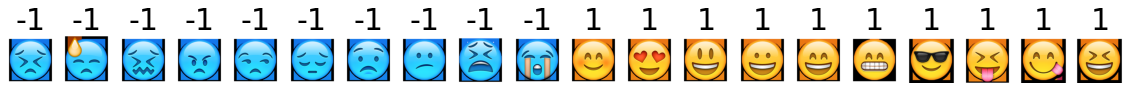

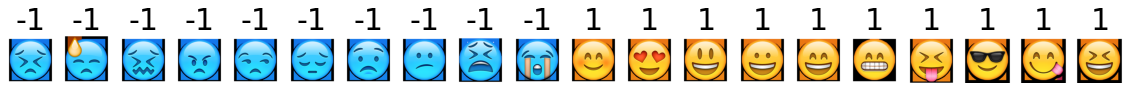

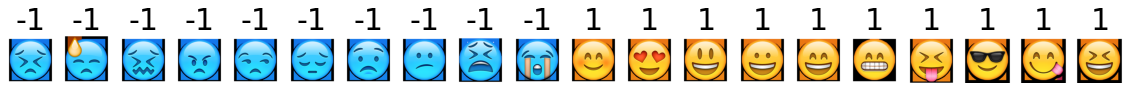

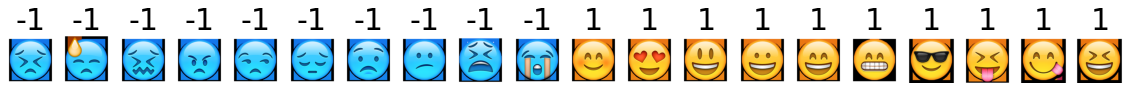

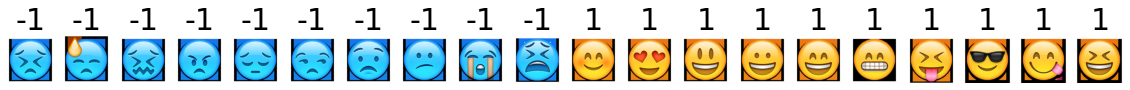

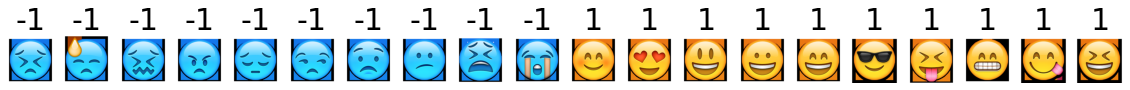

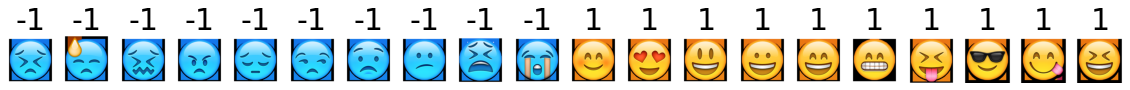

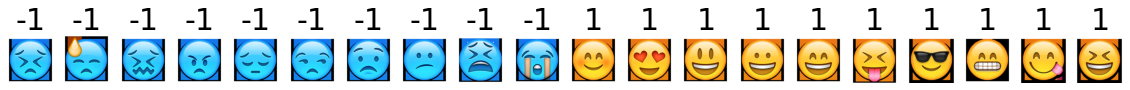

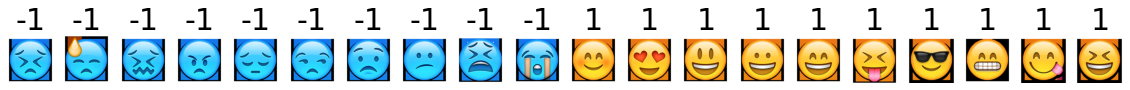

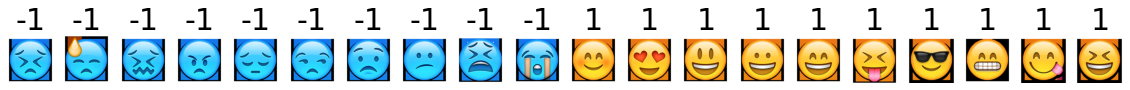

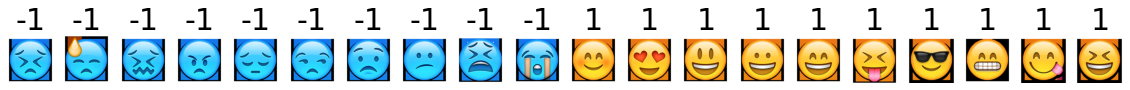

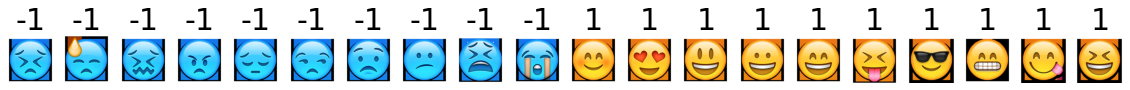

In [75]:
if __name__ == '__main__':
    # Load data
    file_names = glob.glob('DATASET/data_emoji/*/*.*')
    reduced, images, labels = load_image(file_names)
    
    reduced = reduced.reshape(reduced.shape[0], -1)
    # Instantiate Perceptron
    p = PrimalPerceptron(reduced, labels)
    # Iterate over data and update
    
    plt.rcParams["figure.figsize"] = [20, 20]  
    for i in range(100):
        p.update()
        preds, y_hat = p.predict()
        visualize_results(images, preds, labels, None)


### Hyperparameter Tuning
In this part, we will take a look at the effect of different learning rate on model prediction accuracy and running time. Specifically, we would iterate through all learning rate in `[0.0001, 0.001, 0.01, 0.1, 1, 10]` and train the perceptron model based on it. For each learning rate, it will run 50 episodes to record the average running time and accuracy. In each episode, the model is trained 100 times. 

The running time for each episode is defined as the time interval betweeen model is first created and the model reaches 100% accuracy. If the model doesn't reach 100% accuracy, then the running time for this episode would be the whole 100 epoches running time. Take a look at the code cell below to see how it works. 

In [ ]:
# Read in necessary test files
file_names = glob.glob('DATASET/data_emoji/*/*.*')
reduced, images, labels = load_image(file_names)
reduced = reduced.reshape(reduced.shape[0], -1)

# Define a list of hyperparameter for learning rate tuning
lr_set = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

# Training model with different learning rate
for lr in lr_set:
  # Initialize cost for current learning rate model
  cost = 0
  accuracy = 0
  # For each learning rate, run 50 episodes and keep track of average running time
  for episode in range(50):
    start = time.time()
    finish_before = False
    p = PrimalPerceptron(reduced, labels, lr)
    # Training model 100 times
    for i in range(100): 
      p.update()
      preds, y_hat = p.predict()
      # The running time is defined as the time when the model reaches 100% accuracy
      if np.sum(y_hat == labels) == 20 and not finish_before:
        end = time.time()
        finish_before = True
    # If the model doesn't reach 100% accuracy in 100 epoches, then the end running time is defined as the whole 100 epoches running time
    if not finish_before:
        end = time.time()
    # Running time for one episode 
    cost += end - start
    accuracy += np.sum(y_hat == labels)/20 * 100
  # Cost and accuracy for one learning rate model
  cost /= 50
  accuracy /= 50 
  print('Learning rate lr = {}: Reaching {:.2f}% accuracy in {:.3f}s.'.format(lr, accuracy, cost))

Discuss the effect of different learning rate on both the running time and model prediction accuracy. What do you think might cause the difference? Please include your answer in a separate cell in the Colab Notebook.

Answer: If the learning rate is increased then the running time will decrease as higher steps will be taken to reach the least minima, but the problem with this is of overshoot, so the least minima or the goal might not be reached, so the model prediction accuracy might decrease.

However, if the learning rate is decreased then running time will increase, as the approach will take less steps to reach the local minima, but with this the model prediction will be very accurate, as there are less chances of overshoot of the goal or the final result. 
